**https://ptorch.com/ Pytorch中文文档**

In [1]:
import torch
from torch.autograd import Variable
import numpy

In [3]:
x = torch.Tensor(5, 3)
print(x)

tensor(1.00000e-39 *
       [[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0017,  0.0000],
        [ 0.0000,  9.3150,  0.0000]])


In [4]:
x.size()


torch.Size([5, 3])

In [6]:
y = torch.rand(5, 3)
print(y)


tensor([[ 0.6313,  0.4191,  0.3757],
        [ 0.5256,  0.3428,  0.6535],
        [ 0.7957,  0.7694,  0.2869],
        [ 0.5014,  0.9474,  0.6458],
        [ 0.5869,  0.5097,  0.7327]])


In [7]:
print(x + y) 

tensor([[ 0.6313,  0.4191,  0.3757],
        [ 0.5256,  0.3428,  0.6535],
        [ 0.7957,  0.7694,  0.2869],
        [ 0.5014,  0.9474,  0.6458],
        [ 0.5869,  0.5097,  0.7327]])


In [9]:
print(y[:,1])
print(y[:][1])

tensor([ 0.4191,  0.3428,  0.7694,  0.9474,  0.5097])
tensor([ 0.5256,  0.3428,  0.6535])


In [11]:
a = torch.ones(5)
print(a)

tensor([ 1.,  1.,  1.,  1.,  1.])


In [14]:
A = a.numpy()
print(A)

[1. 1. 1. 1. 1.]


In [16]:
x = Variable(torch.ones(2, 2), requires_grad = True)

In [22]:
y = x + 2
z = y * y * 3
out = z.mean()


In [23]:
out.backward()
x.grad

tensor([[ 9.,  9.],
        [ 9.,  9.]])

In [38]:
import torchvision
import torchvision.transforms as transforms


# torchvision数据集的输出是在[0, 1]范围内的PILImage图片。
# 我们此处使用归一化的方法将其转化为Tensor，数据范围为[-1, 1]

transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, 
                                          shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
'''注：这一部分需要下载部分数据集 因此速度可能会有一些慢 同时你会看到这样的输出

Downloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz
Extracting tar file
Done!
Files already downloaded and verified
'''

Files already downloaded and verified


'注：这一部分需要下载部分数据集 因此速度可能会有一些慢 同时你会看到这样的输出\n\nDownloading http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz to ./data/cifar-10-python.tar.gz\nExtracting tar file\nDone!\nFiles already downloaded and verified\n'

 ship  deer truck horse


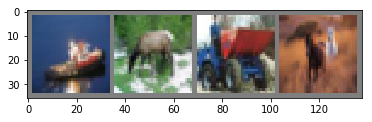

In [39]:
# functions to show an image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# show some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [40]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool  = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [41]:
criterion = nn.CrossEntropyLoss() # use a Classification Cross-Entropy loss
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [42]:
for epoch in range(2): # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()        
        optimizer.step()
        
        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999: # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')


D:\anaconda\lib\site-packages\ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


[1,  2000] loss: 2.147
[1,  4000] loss: 1.830
[1,  6000] loss: 1.639
[1,  8000] loss: 1.573
[1, 10000] loss: 1.519
[1, 12000] loss: 1.462
[2,  2000] loss: 1.380
[2,  4000] loss: 1.357
[2,  6000] loss: 1.334
[2,  8000] loss: 1.335
[2, 10000] loss: 1.281
[2, 12000] loss: 1.259
Finished Training


GroundTruth:    cat  ship  ship plane


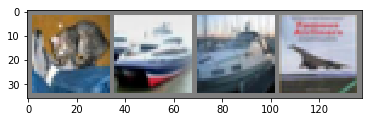

In [43]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s'%classes[labels[j]] for j in range(4)))

In [44]:
outputs = net(Variable(images))

# the outputs are energies for the 10 classes. 
# Higher the energy for a class, the more the network 
# thinks that the image is of the particular class

# So, let's get the index of the highest energy
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s'% classes[predicted[j][0]] for j in range(4)))


Predicted:    cat   car  ship  ship


D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  # Remove the CWD from sys.path while we load stuff.


In [45]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))



Accuracy of the network on the 10000 test images: 56 %


In [46]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))



RuntimeError: value cannot be converted to type uint8_t without overflow: 1000.000000

In [47]:
#!/usr/bin/env python

from __future__ import print_function

from itertools import count



import torch

import torch.autograd

import torch.nn.functional as F



POLY_DEGREE = 4

W_target = torch.randn(POLY_DEGREE, 1) * 5

b_target = torch.randn(1) * 5





def make_features(x):

    """Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""

    x = x.unsqueeze(1)

    return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)





def f(x):

    """Approximated function."""

    return x.mm(W_target) + b_target.item()





def poly_desc(W, b):

    """Creates a string description of a polynomial."""

    result = 'y = '

    for i, w in enumerate(W):

        result += '{:+.2f} x^{} '.format(w, len(W) - i)

    result += '{:+.2f}'.format(b[0])

    return result





def get_batch(batch_size=32):

    """Builds a batch i.e. (x, f(x)) pair."""

    random = torch.randn(batch_size)

    x = make_features(random)

    y = f(x)

    return x, y





# Define model

fc = torch.nn.Linear(W_target.size(0), 1)



for batch_idx in count(1):

    # Get data

    batch_x, batch_y = get_batch()



    # Reset gradients

    fc.zero_grad()



    # Forward pass

    output = F.smooth_l1_loss(fc(batch_x), batch_y)

    loss = output.item()



    # Backward pass

    output.backward()



    # Apply gradients

    for param in fc.parameters():

        param.data.add_(-0.1 * param.grad.data)



    # Stop criterion

    if loss < 1e-3:

        break



print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))

print('==> Learned function:\t' + poly_desc(fc.weight.view(-1), fc.bias))

print('==> Actual function:\t' + poly_desc(W_target.view(-1), b_target))

Loss: 0.000914 after 529 batches
==> Learned function:	y = +4.97 x^4 +5.17 x^3 +3.93 x^2 +5.45 x^1 +0.21
==> Actual function:	y = +5.00 x^4 +5.25 x^3 +3.92 x^2 +5.43 x^1 +0.21
